# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of
students and busy professionals rely on those restaurants due to their
hectic lifestyles. Online food delivery service is a great option for
them. It provides them with good food from their favorite restaurants. A
food aggregator company FoodHub offers access to multiple restaurants
through a single smartphone app.

The app allows the restaurants to receive a direct online order from a
customer. The app assigns a delivery person from the company to pick up
the order after it is confirmed by the restaurant. The delivery person
then uses the map to reach the restaurant and waits for the food
package. Once the food package is handed over to the delivery person,
he/she confirms the pick-up in the app and travels to the customer's
location to deliver the food. The delivery person confirms the drop-off
in the app after delivering the food package to the customer. The
customer can rate the order in the app. The food aggregator earns money
by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders
made by the registered customers in their online portal. They want to
analyze the data to get a fair idea about the demand of different
restaurants which will help them in enhancing their customer experience.
Suppose you are hired as a Data Scientist in this company and the Data
Science team has shared some of the key questions that need to be
answered. Perform the data analysis to find answers to these questions
that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The
detailed data dictionary is given below.

### Data Dictionary

-   order_id: Unique ID of the order
-   customer_id: ID of the customer who ordered the food
-   restaurant_name: Name of the restaurant
-   cuisine_type: Cuisine ordered by the customer
-   cost: Cost of the order
-   day_of_the_week: Indicates whether the order is placed on a weekday
    or weekend (The weekday is from Monday to Friday and the weekend is
    Saturday and Sunday)
-   rating: Rating given by the customer out of 5
-   food_preparation_time: Time (in minutes) taken by the restaurant to
    prepare the food. This is calculated by taking the difference
    between the timestamps of the restaurant's order confirmation and
    the delivery person's pick-up confirmation.
-   delivery_time: Time (in minutes) taken by the delivery person to
    deliver the food package. This is calculated by taking the
    difference between the timestamps of the delivery person's pick-up
    confirmation and drop-off information

In [1]:
### importing the required libraries

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')

# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Initial Observations

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in
each row corresponds to the order placed by a customer.

In [3]:
#shape of the data
df.shape

(1898, 9)

- The dataset has 1898 rows and has 9 columns.

In [4]:
# get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


- There are no empty cells in the dataset. 
- There are no missing cells. 
- 4 columns contain object type data.
- 4 columns contain int type data. 
- 1 column contains float type data.

In [5]:
# coverting dtype "object" to "category" to reduce the data space required to store the dataframe

#converting selected columns to category

for col in ['restaurant_name', 'cuisine_type', 'day_of_the_week']:
    df[col] = df[col].astype('category')
        

In [6]:
# get new summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


In [7]:
# statistical summary of data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations

- The count for all 5 columns are consistent following the prior
    observation of no cells being empty.
- The mean cost of orders is 16.50.
- That of food preparation time is 27.37
- That of the delivery time is 24.16.
- The standard deviation of the food preparation time and delivery
    time are more clustered around the mean.
- Standard deviation for the cost of order is a little dispersed.
- Cost of order has min and max values of 4.47 and 35.41 respectively.

In [8]:
#calculating orders = not given
(df.rating == 'Not given').sum()

736

- 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Exploring all variables and providing observations on their distributions

In [9]:
# Creating a function which plots the boxplot and histogram for numerical columns   
        
# function to plot a boxplot and a histogram along the same scale.


def hist_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

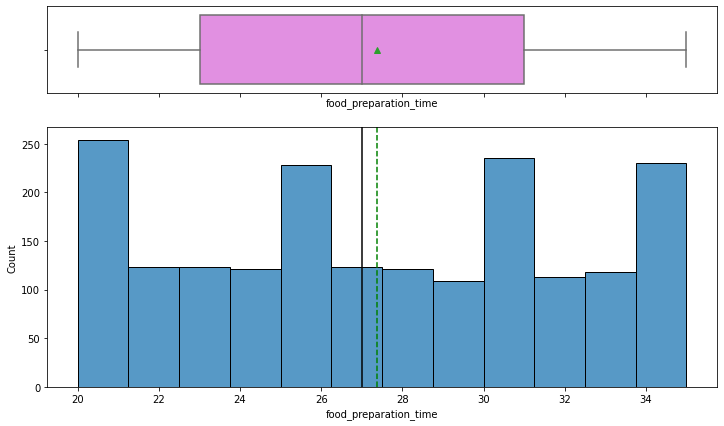

In [10]:
#hist_boxplot of food prep time

hist_boxplot(df, 'food_preparation_time')

**Observation**

1.  The food preparation time has a fairly symmetrical distribution.
2.  Median time is \~ 27 and the mean isn't far off with a value of
    \~27.5.
3.  There are no outliers in this variable.
4.  The distribution of food preparation time peaks at 20 minutes but
    26,30 and 34 minutes have similar distributions.

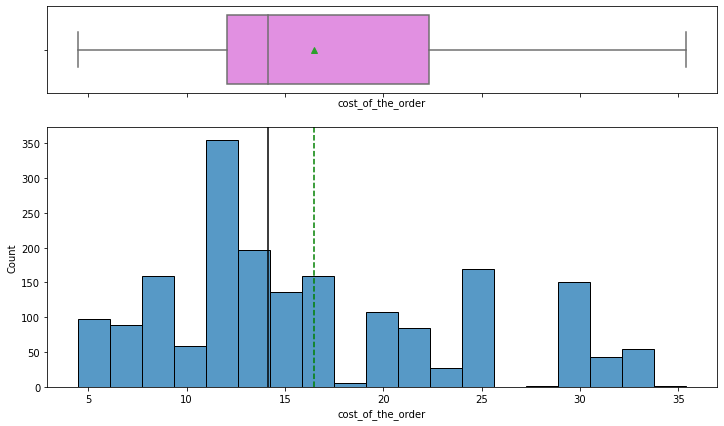

In [11]:
#hist_boxplot of cost of the order

hist_boxplot(df, 'cost_of_the_order')

**Observation**

1.  The distribution of cost of order is skewed a little to the right.
2.  Median cost is \~ 13 minutes.
3.  Mean is \~ 17.
4.  There are no outliers in this variable.
5.  The distribution of cost of order significantly peaks at \~12
    minutes.

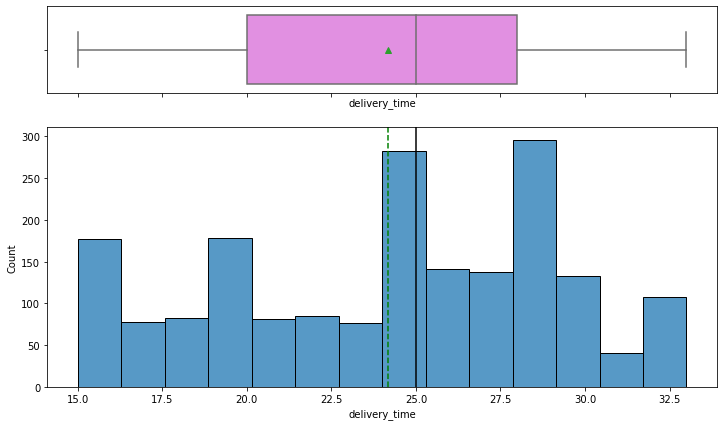

In [12]:
#hist_boxplot of delivery time

hist_boxplot(df, 'delivery_time')

**Observation**

1.  The distribution of delivery time is fairly symmetrical.
2.  Median time is 25 minutes.
3.  Mean is \~ 17.
4.  There are no outliers in this variable.
5.  The distribution of delivery time significantly peaks at \~29
    minutes.
6.  There are some large delivery times with high distribution.

In [13]:
#replacing 'not given' values with nan.
df['rating'] = df['rating'].replace('Not given', np.nan)

#converting to float from object
df['rating'] = df['rating'].astype('float')

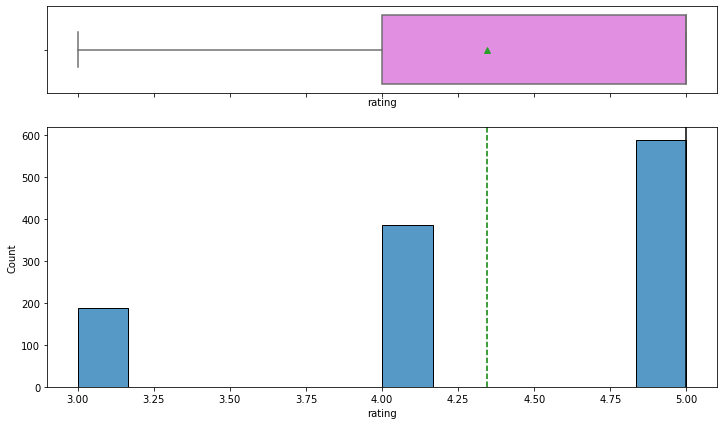

In [14]:
#hist_boxplot of rating

hist_boxplot(df, 'rating')

**Observation**

1.  The distribution of rating is very skewed to the left.
2.  Median rating is 5 minutes.
3.  Mean is \~ 4,35.
4.  There are no outliers in this variable.
5.  The distribution of rating significantly peaks at 5.
6.  Almost all reviews and ratings given are positive.

In [15]:
#Creating a function to draw a categorical barplot.
    
def df_barplot(data, feature, perc=False, n=None):

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


<Figure size 720x504 with 0 Axes>

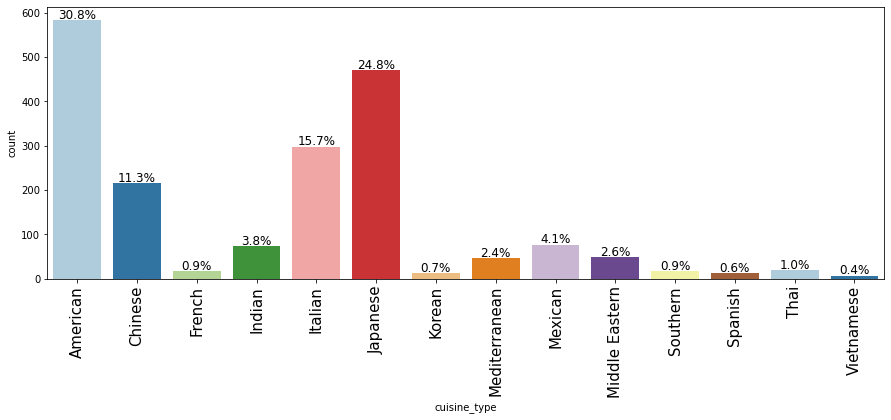

In [16]:
#bar_plot of cuisine type frequency

plt.figure(figsize=(10,7))
df_barplot(df, 'cuisine_type', perc=True)

**Observation**

1.  The observations are distributed heavily in favor of American
    cuisine and Japanese cuisine with 30.8% and 24.8% respectively.
2.  Italian cuisine is also ordered frequently with 15.7% of all orders.
3.  Chinese cuisine has 11.3% of all orders.
4.  Vietnamese cuisine has the lowest distribution with 0.4%

<Figure size 1080x720 with 0 Axes>

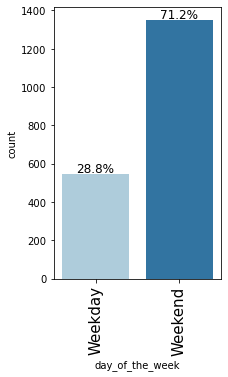

<function matplotlib.pyplot.show(close=None, block=None)>

In [17]:
#bar_plot of day of the week distribution

plt.figure(figsize=(15,10))
df_barplot(df, 'day_of_the_week', perc=True)
plt.show

**Observation**

1.  An overwhelming majorirty of orders come in the weekends. Weekends
    account for 71.2% of all orders.
2.  Demand more than doubles on the weekend.

In [18]:
#sorting by average cost of order per cuisine

ex_cou = (df.groupby(['cuisine_type'])['cost_of_the_order'].mean()).sort_values(ascending = False)

print (ex_cou)

cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64


C:\Users\iremo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

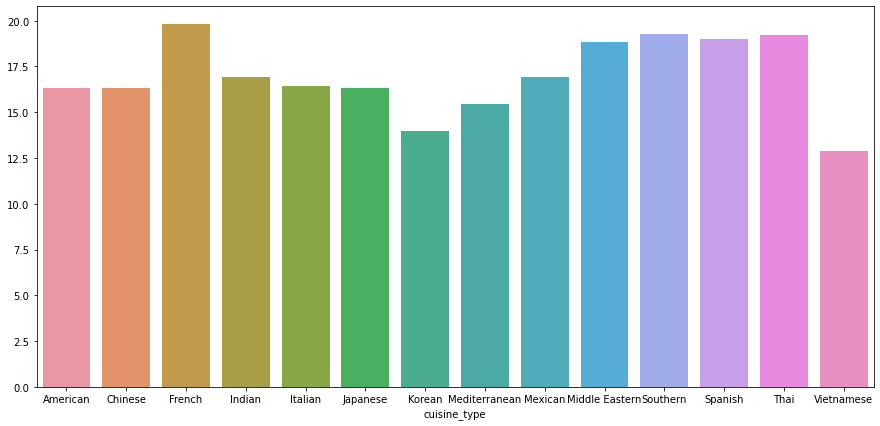

In [19]:
#barplot of cost of cuisine 

plt.figure(figsize=(15,7))
sns.barplot(ex_cou.index,ex_cou.values)
plt.show

In [20]:
#sorting cuisines by delivery time

jk = (df.groupby(['cuisine_type'])['delivery_time'].mean()).sort_values(ascending = False)

print (jk)

cuisine_type
Vietnamese        26.142857
French            25.333333
Italian           24.567114
Mexican           24.389610
American          24.193493
Japanese          24.131915
Indian            24.082192
Middle Eastern    24.081633
Chinese           23.855814
Southern          23.823529
Mediterranean     23.586957
Spanish           23.416667
Thai              23.157895
Korean            20.923077
Name: delivery_time, dtype: float64


C:\Users\iremo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

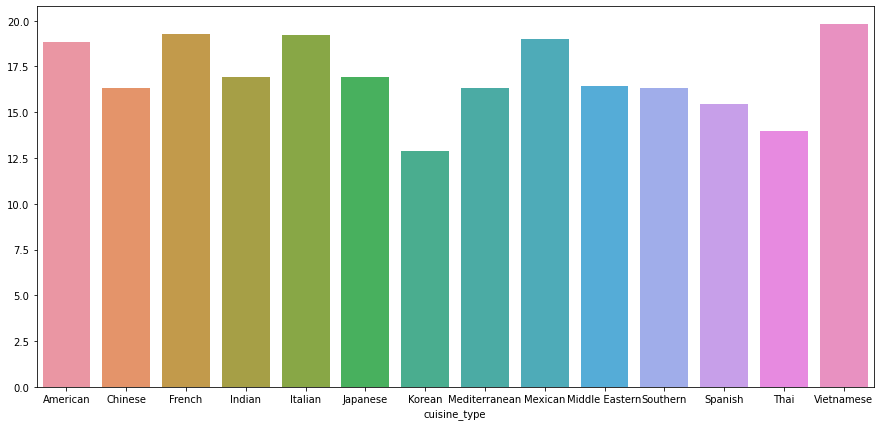

In [21]:
#barplot of cuisines against delivery time

plt.figure(figsize=(15,7))
sns.barplot(jk.index,ex_cou.values)
plt.show

In [22]:
### Finding out the top 10 restaurants for orders received

df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations

1.  The restaurants with the most orders are Shake Shack, The Meatball
    Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm in that
    order.

In [23]:
### Finding out the most popular cuisine on weekends

pwc = (df.loc[df['day_of_the_week'] == 'Weekend', 'cuisine_type'].value_counts())

print (f'The most popular weekend cuisine is {pwc}')


The most popular weekend cuisine is American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64


C:\Users\iremo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

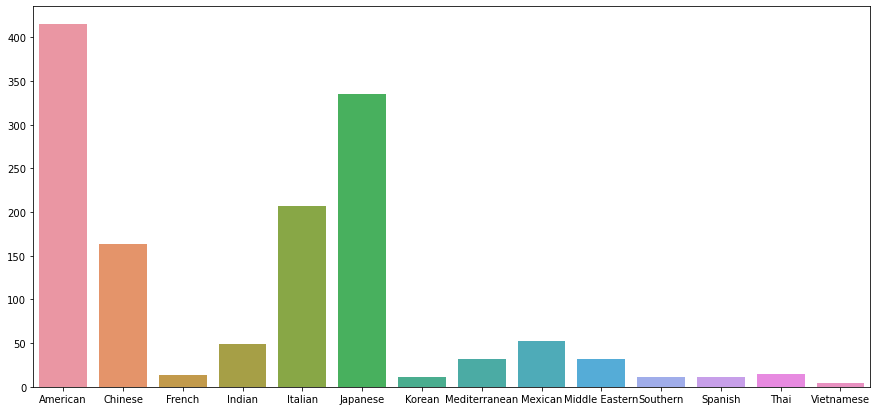

In [24]:
#barplot of most popular cuisines
    
plt.figure(figsize=(15,7))
sns.barplot(pwc.index,pwc.values)
plt.show

#### Observations:

1.  The most popular weekend cuisine type is American by almost 100
    orders.

In [25]:
### Finding out the mean delivery time

round(df["delivery_time"].mean(),2)

24.16

#### Observations

1.  The mean delivery time of the dataset is 24.16

### Multivariate Analysis

### Explore relationships between important variables in the dataset.

In [26]:
# one hot encoding the day of the week column so as to perform correlation on it.

ui = pd.get_dummies(df['day_of_the_week'])
df = df.join(ui)

In [27]:
#seperating the numerical variables
    
num_var = ['rating','food_preparation_time','cost_of_the_order','delivery_time','Weekend','Weekday']


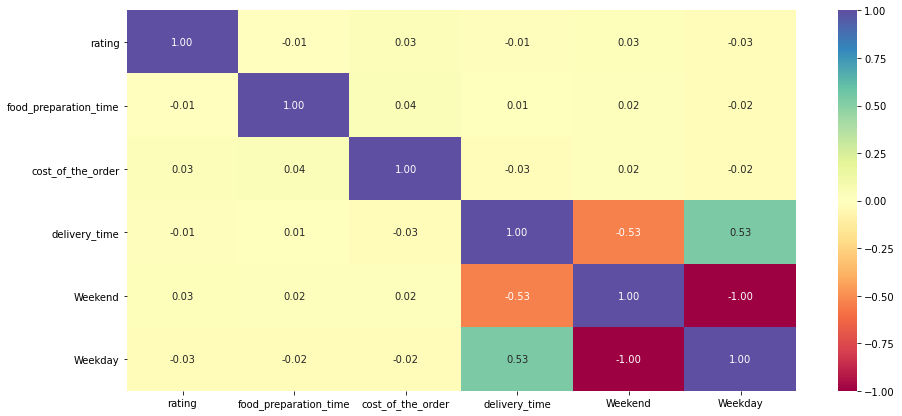

In [28]:
corr = df[num_var].corr()

# plotting the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()


**Observations**

-   As expected, delivery time shows relatively high correlation with
    weekday.
-   Delivery times increase of weekdays and the correlation matrix
    confirms that.
-   It is important to note that correlation does not imply causation.
-   There does not seem to be a strong relationship between any other
    features.

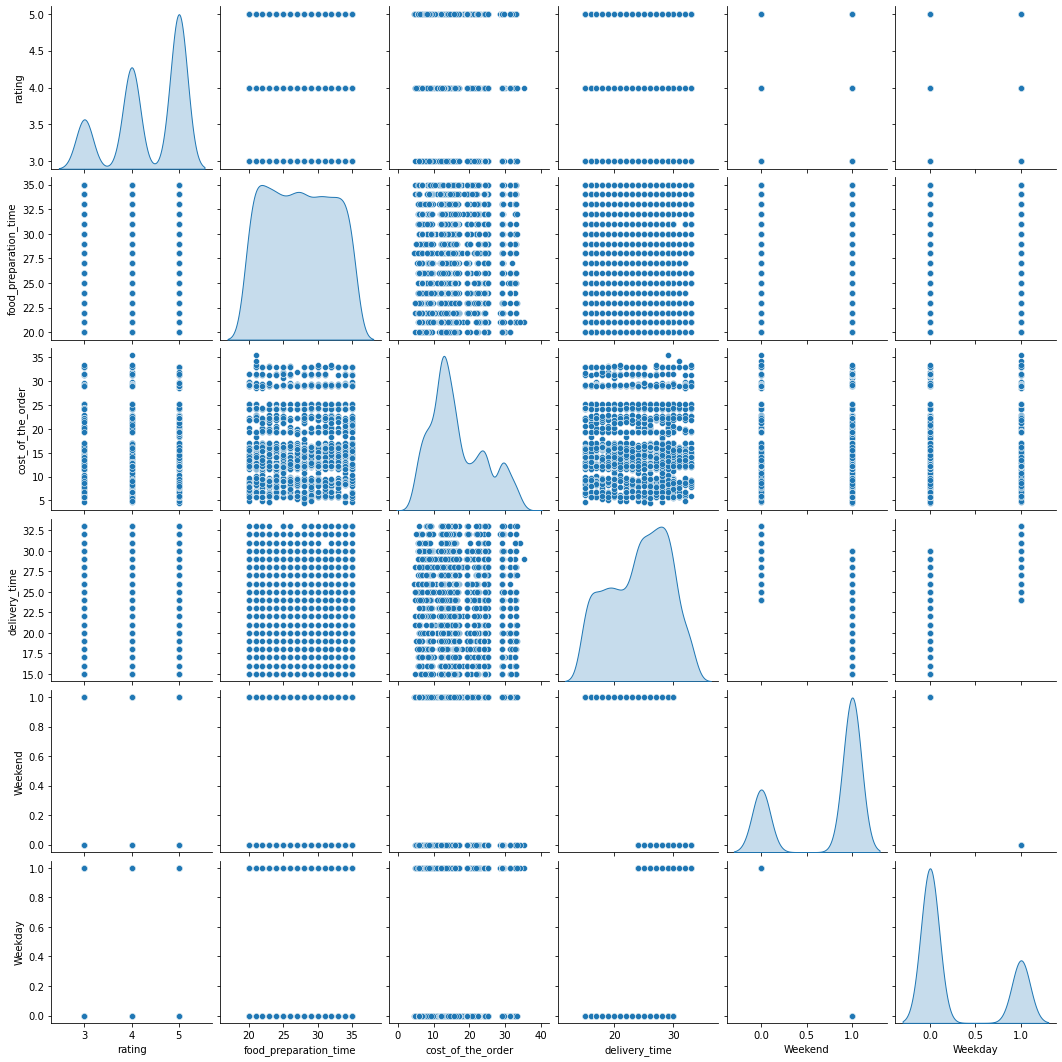

In [29]:
#drawing the pairplot

sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()


**Observations**

-   We get the same insights as from the correlation plot
-   There does not seem to be a strong relationship between the
    features.


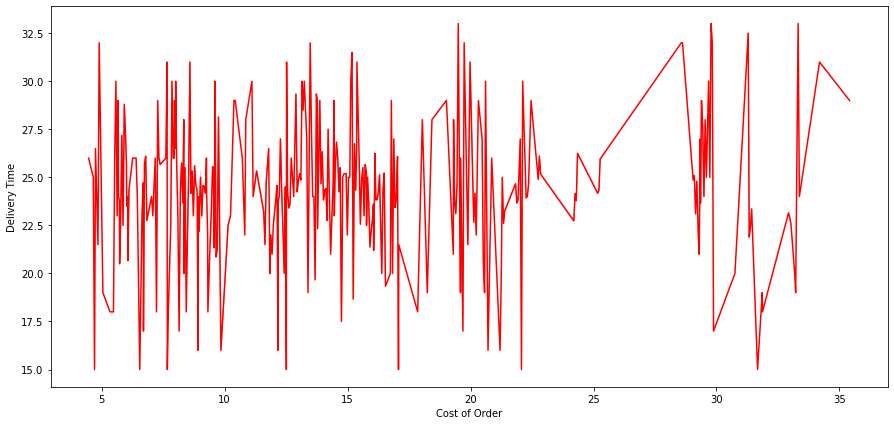

In [30]:
#checking for corellation between delivery time and cost of order
    
plt.figure(figsize=(15,7))
sns.lineplot(x=df["cost_of_the_order"], y=df["delivery_time"],estimator='mean',ci=0,data=df,color="RED")
plt.ylabel('Delivery Time')
plt.xlabel('Cost of Order')
plt.show()

**Observations**

-   We get the same insights as from the correlation plot
-   There does not seem to be a strong relationship between Delivery
    Time and Cost of meal ordered.


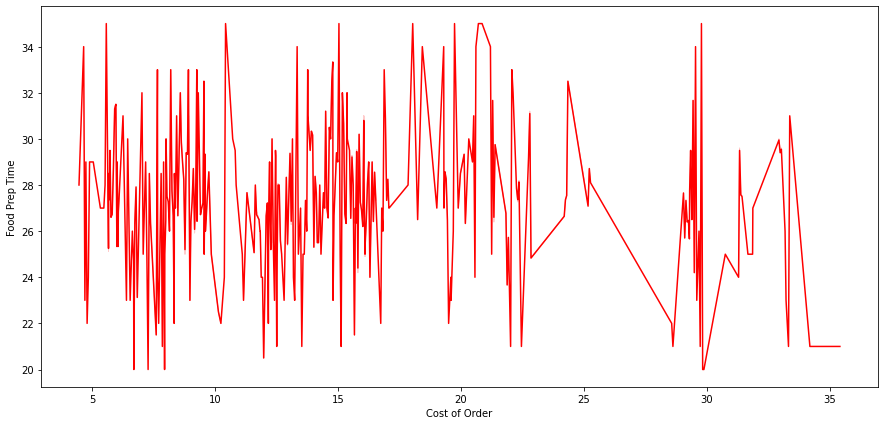

In [31]:
#checking for corellation between food preparation time and cost of order
    
plt.figure(figsize=(15,7))
sns.lineplot(x=df["cost_of_the_order"], y=df["food_preparation_time"],estimator='mean',ci=0,data=df,color="RED")
plt.ylabel('Food Prep Time')
plt.xlabel('Cost of Order')
plt.show()

**Observations**

-   We get the same insights as from the correlation plot
-   There does not seem to be a strong relationship between cost of
    order and food preparation time.

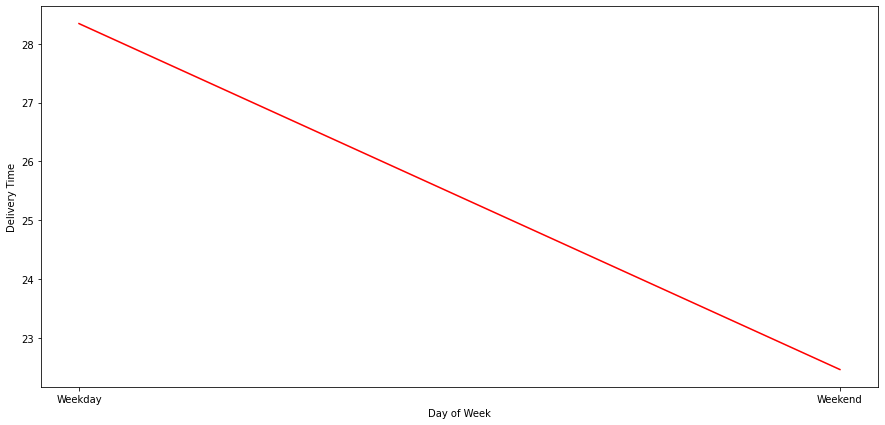

In [32]:
#checking for corellation between delivery time and day of the week
    
plt.figure(figsize=(15,7))
sns.lineplot(x=df["day_of_the_week"], y=df["delivery_time"],estimator='mean',ci=0,data=df,color="RED")
plt.ylabel('Delivery Time')
plt.xlabel('Day of Week')
plt.show()

**Observations**

-   We get the same insights as from the correlation plot
-   There seems to be a strong relationship between delivery time and
    day of the week.


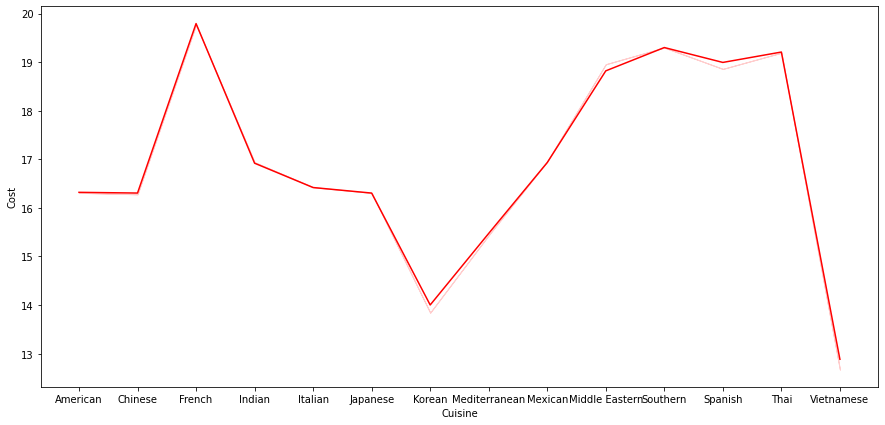

In [33]:
plt.figure(figsize=(15,7))
sns.lineplot(x=df["cuisine_type"], y=df["cost_of_the_order"],estimator='mean',ci=0,data=df,color="RED")
plt.ylabel('Cost')
plt.xlabel('Cuisine')
plt.show()

**Observations**

-   We get the same insights as from the histogram.
-   French, Thai and Spanish are the most expensive cuisines.


### Based on preliminary obesrvations, I am exploring the idea of the company providing a promotional offer in the advertisement of the restaurants. On the basis of the restaurants having a rating count of more than 50 and an average rating greater than 4. The restauants which meet the criteria will be stated below.

In [34]:


df['rating'] = df['rating'].replace('Not given', np.nan)

df['rating'] = df['rating'].astype('float')

df['rating'].fillna(df['rating'].median(), inplace=True)


In [35]:
suitable_restaurants = []

for x in (df['restaurant_name'].unique()):
    if (len(df[(df['restaurant_name']== x)])) > 50 and (df.loc[df['restaurant_name'] == x, 'rating'].mean()) > 4:
        suitable_restaurants.append(x)

print (suitable_restaurants)

['Blue Ribbon Fried Chicken', 'The Meatball Shop', 'Shake Shack', 'RedFarm Hudson', 'Blue Ribbon Sushi', 'Parm', 'RedFarm Broadway']


#### Observations

1.  The restaurants fulfilling the promotional offer criteria are - Blue
    Ribbon Fried Chicken, The Meatball Shop, Shake Shack, RedFarm
    Hudson, Blue Ribbon Sushi, Parm, RedFarm Broadway.

### Finding out the percentage of orders with an unusually large total delivery time (>60mins)

In [36]:
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

print ('Rows with Total Delivery Time greater than 60 minutes is: ', len(df[(df['total_delivery_time']>60)]))

print ('Percentage is:',round(((len(df[(df['total_delivery_time']>60)]))/1898)*100,2),'%')


Rows with Total Delivery Time greater than 60 minutes is:  200
Percentage is: 10.54 %


#### Observations:

1.  The percentage of orders with more than 60 minutes total delivery
    time is 10.54%

### Analysing the delivery time of the orders on weekdays as opposed to orders on weekends. 

In [37]:
Weekend_delivery_mean = (df.loc[df['day_of_the_week'] == 'Weekend', 'delivery_time'].mean())

Weekday_delivery_mean = (df.loc[df['day_of_the_week'] == 'Weekday', 'delivery_time'].mean())

print ('Weekday Delivery Mean = ',round(Weekday_delivery_mean,2))

print ('Weekend Delivery Mean = ',round(Weekend_delivery_mean,2))

Weekday Delivery Mean =  28.34
Weekend Delivery Mean =  22.47


#### Observations:

1.  The delivery time of orders on the weekend is lower by around 6
    minutes than the delivery time on weekdays.
2.  This might be due to reduced traffic as a result of less people
    being out of their homes on weekends.

## Conclusion

We analyzed a dataset of 1899 online food orders from restaurants in New
York. The data spanned every day of the first six months of the year
2015. The main feature of interest here is the delivery time

We have been able to conclude that

1.  Food preparation time has little to no impact on the orders.
2.  Cost of the order also has little to no impact on the frequency of
    orders.
3.  The amount of orders is higher on the weekends by a wide margin as
    compared to weekdays.
4.  It is encouraging to see that New Yorkers have a good experince at
    all the different restaurants as ratings were positive with no
    negative one.
5.  The most popular cuisine is the American cuisine followed closely by
    the Japanese.
6.  Delivery time on weekends is significantly less than on weekdays.
7.  We need to investigate whether the low delivery times during
    weekdays influence the large amount of orders which come in during
    that period.
8.  Lowering delivery times on weekdays might lead to a rise in the
    volume of orders during that period. More efficiency should be
    sought.
9.  Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried
    Chicken and Parm are the most popular restaurants.

## Recommendation to business

1.  American, Japanese, Italian and Chinese cuisines are the most
    popular and have the most potential for selling out and bringing in
    more profit.
2.  The most popular cuisines should be given special promotions more
    often to further increase popularity and sales.
3.  There is increased demand during weekends so food availability must
    be ensured during this time.
4.  Procure data showing specific order times so as to identify trends
    during diffrent times of the day.
5.  Procure more data on price and build a model to predict optimal
    pricing.
6.  French, Korean, Southern, Spanish and Vietnamese cuisine have the
    loswest demand and more studies should be carried out to determine
    if it's cost effective to keep them in stock.
7.  Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried
    Chicken and Parm being the most popular restaurants and our biggest
    profit getters should be given promotions to help boost sales
    further.

## Further Analysis

1.  Dig deeper to explore the variation of food demand, during working
    days and non-working days. You can combine Weekends+Holidays to be
    non-working days and weekdays to be the working days.
2.  Drop the cuisines that have negligible value counts and then analyze
    the data to uncover more insights.